In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 15.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
import shap
from wordcloud import WordCloud
import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_csv("/content/sample_data/telecom_customer_churn.csv")

In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()
print("\nFirst 5 Rows:")
df.head()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies 

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

# Fill missing values
df = df.fillna(0)

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude',
                   'Churn Category']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [ ]:
# Exploratory Data Analysis (EDA)

# Summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,22.958954,20.515405,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,3.001199,24.542061,15.448113,20.418940,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


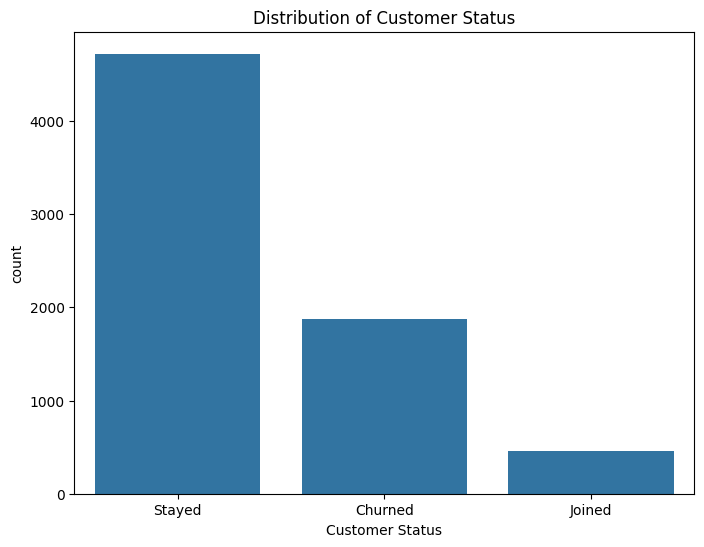

In [ ]:
# Distribution of Customer Status (Churn)
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Status', data=df)
plt.title('Distribution of Customer Status')
plt.show()

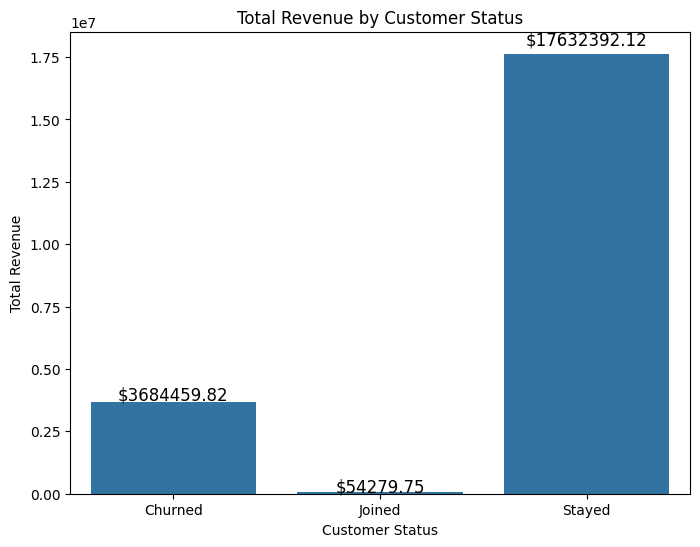

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total revenue per customer status
revenue_per_status = df.groupby('Customer Status')['Total Revenue'].sum().reset_index()

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Status', y='Total Revenue', data=revenue_per_status)

# Adding the title and labels
plt.title('Total Revenue by Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Total Revenue')

# bars with the total revenue values
for index, row in revenue_per_status.iterrows():
    plt.text(index, row['Total Revenue'] + row['Total Revenue']*0.02, f"${row['Total Revenue']:.2f}",
             color='black', ha="center", fontsize=12)

# Show the plot
plt.show()

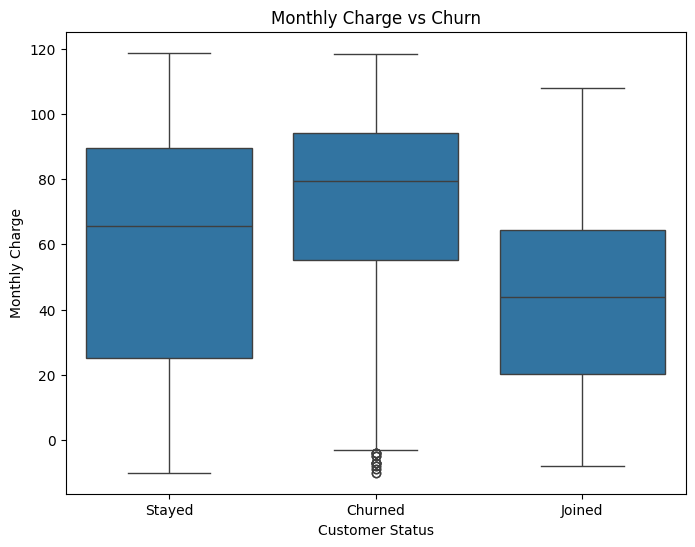

In [ ]:
# Monthly Charge vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer Status', y='Monthly Charge', data=df)
plt.title('Monthly Charge vs Churn')
plt.show()

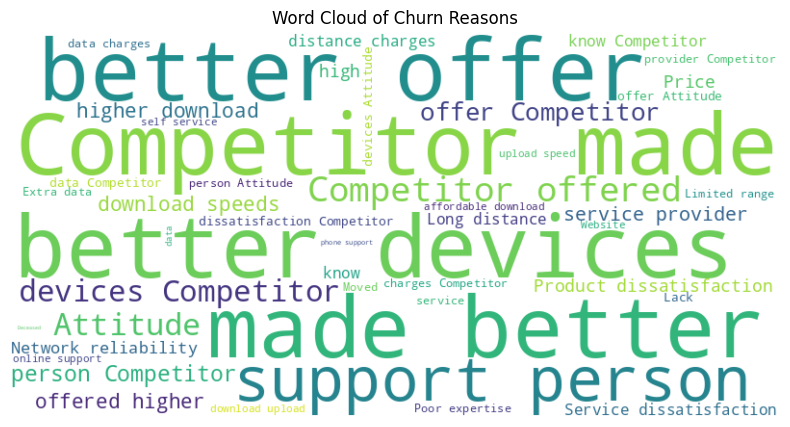

In [ ]:
# Word Cloud for Churn Reasons
plt.figure(figsize=(10, 5))
text = ' '.join(df['Churn Reason'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Churn Reasons')
plt.show()

In [ ]:
# Data Preparation for Modeling

# Prepare features (X) and target (y)
X = df.drop('Customer Status', axis=1)
y = df['Customer Status']

In [ ]:
# One-Hot Encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Label Encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Handle missing values (if any were coerced to NaN)
X = X.fillna(X.mean())

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Model Training: XGBoost Classifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Model Evaluation

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       551
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00      1409

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



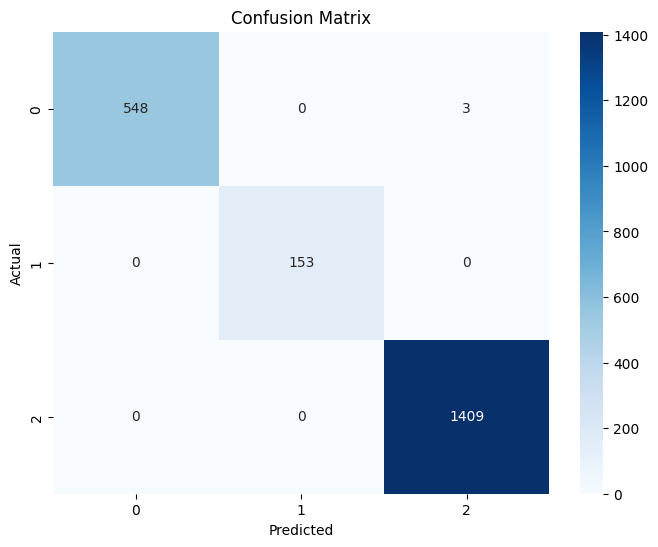

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

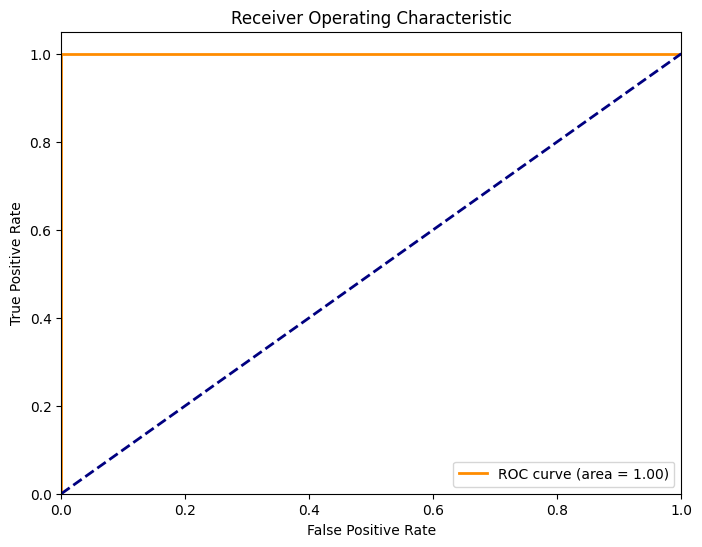

In [ ]:
# ROC Curve and AUC
y_prob = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# SHAP Values for Model Interpretation
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

SHAP Summary Plot for Class 0


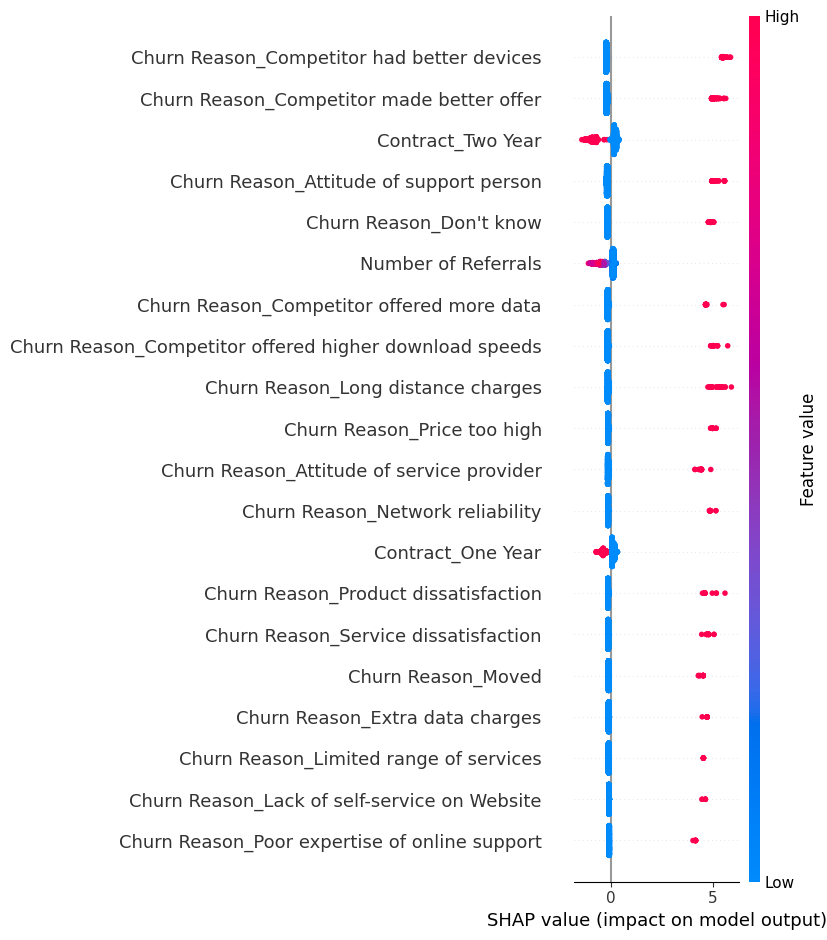

SHAP Summary Plot for Class 1


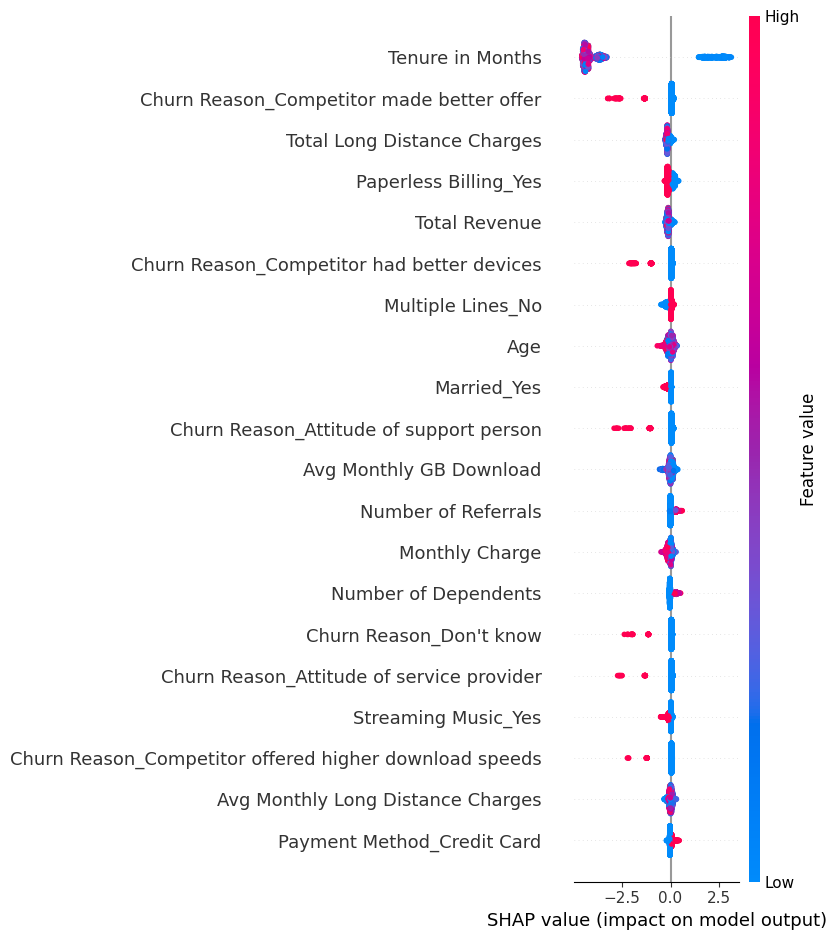

SHAP Summary Plot for Class 2


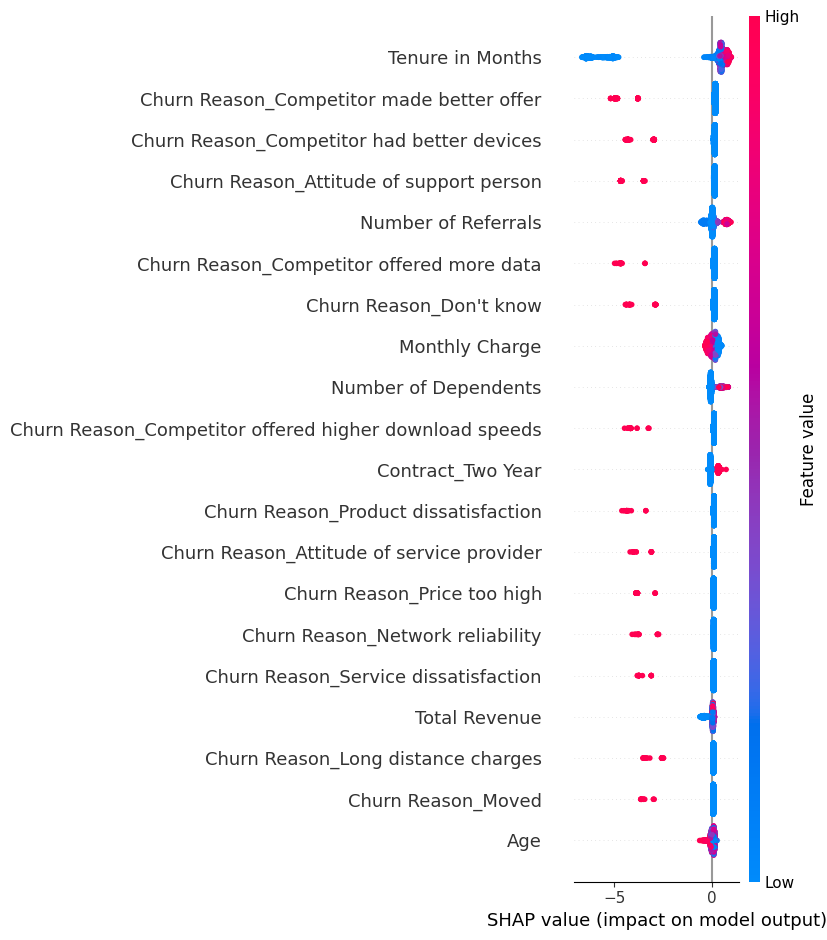

In [ ]:
# Plot SHAP values for the each class
for i in range(shap_values.shape[2]):  # Loop through each class
    print(f"SHAP Summary Plot for Class {i}")
    shap.summary_plot(shap_values[:, :, i], X_test)

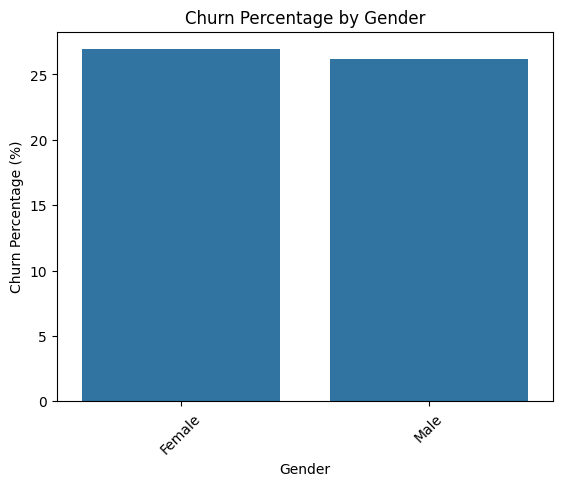

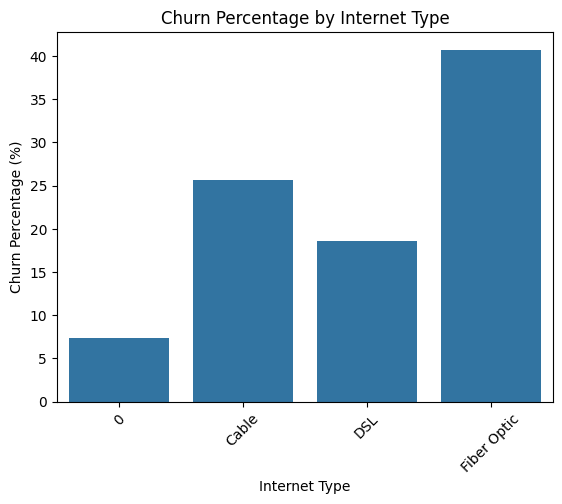

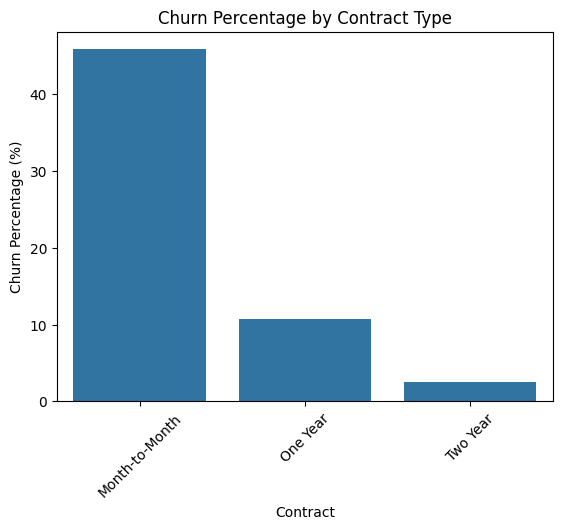

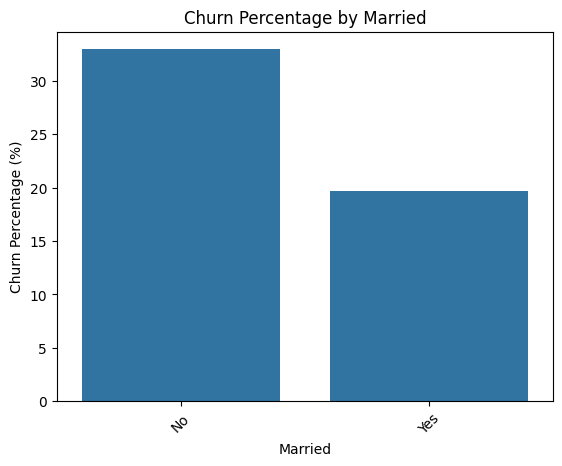

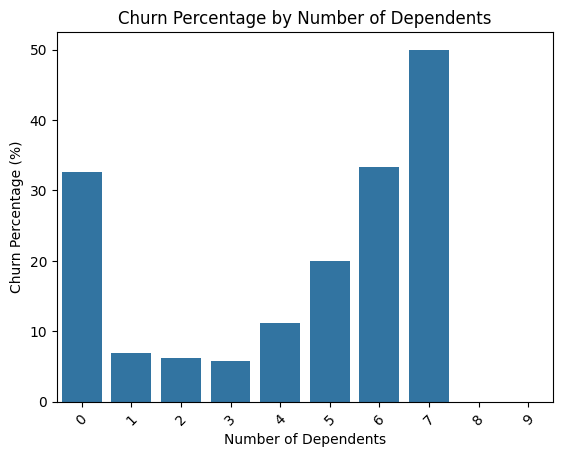

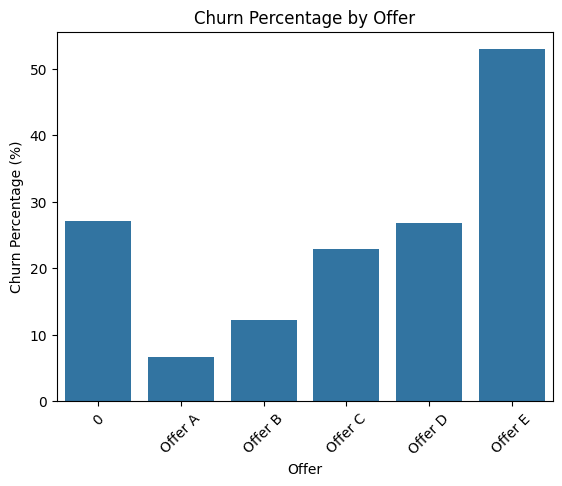

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Customer Status' to binary for easier analysis: 1 for 'Churned', 0 for others
df['Churn'] = df['Customer Status'].apply(lambda x: 1 if x == 'Churned' else 0)

# Function to plot churn percentage by a categorical feature
def plot_churn_percentage_by_category(df, category, title):
    # Calculate the churn percentage by category
    churn_percentage = df.groupby(category)['Churn'].mean() * 100

    # Create the bar plot
    sns.barplot(x=churn_percentage.index, y=churn_percentage.values)
    plt.title(f'Churn Percentage by {title}')
    plt.ylabel('Churn Percentage (%)')
    plt.xlabel(category)
    plt.xticks(rotation=45)
    plt.show()

# Churn percentage by Gender
plot_churn_percentage_by_category(df, 'Gender', 'Gender')

# Churn percentage by Internet Type
plot_churn_percentage_by_category(df, 'Internet Type', 'Internet Type')

# Churn percentage by Contract Type
plot_churn_percentage_by_category(df, 'Contract', 'Contract Type')

# Churn percentage by Married
plot_churn_percentage_by_category(df, 'Married', 'Married')

# Churn percentage by Number of Dependents
plot_churn_percentage_by_category(df, 'Number of Dependents', 'Number of Dependents')

# Churn percentage by Offer
plot_churn_percentage_by_category(df, 'Offer', 'Offer')


In [ ]:
# Additional Analysis: Customer Segmentation using K-Means Clustering

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

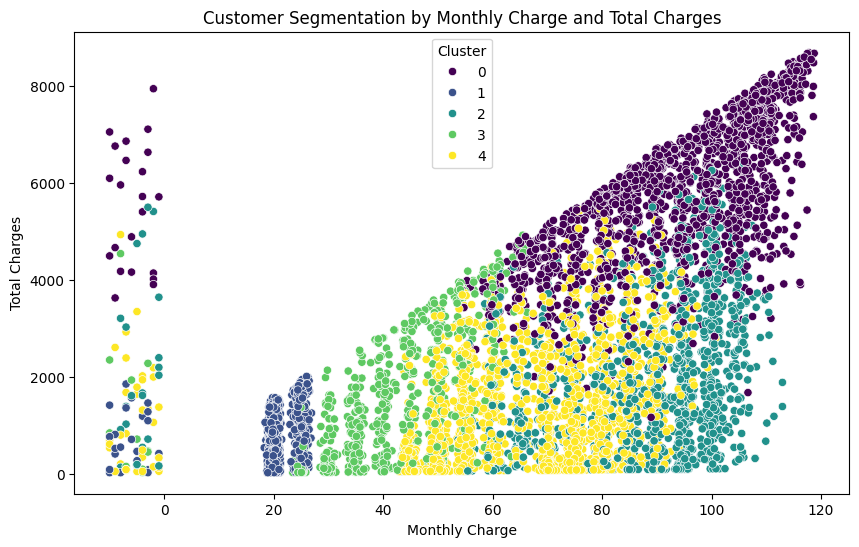

In [ ]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly Charge', y='Total Charges', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation by Monthly Charge and Total Charges')
plt.show()

In [ ]:
# Hyperparameter Tuning using GridSearchCV (Additional, just used to optimize the model to achieve the best possible performance)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("Best Parameters from GridSearchCV:", best_params)

Best Parameters from GridSearchCV: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200}


In [ ]:
# Re-train the model with the best parameters
model = XGBClassifier(**best_params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       551
           1       0.99      1.00      1.00       153
           2       1.00      1.00      1.00      1409

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113

Confusion Matrix:
[[ 547    1    3]
 [   0  153    0]
 [   0    0 1409]]


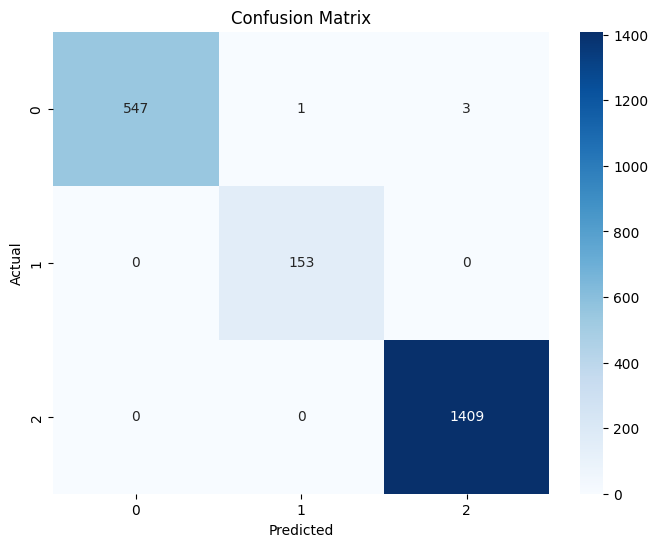

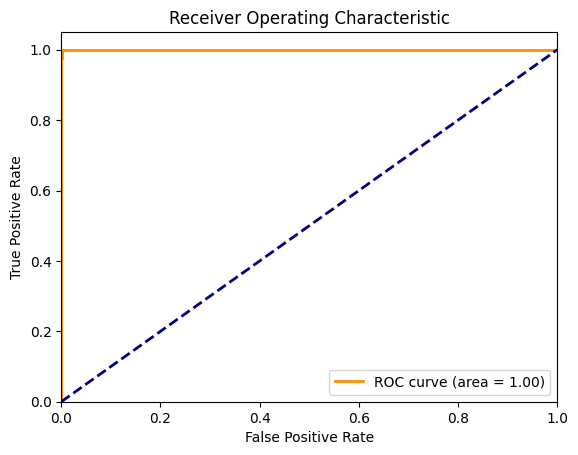

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

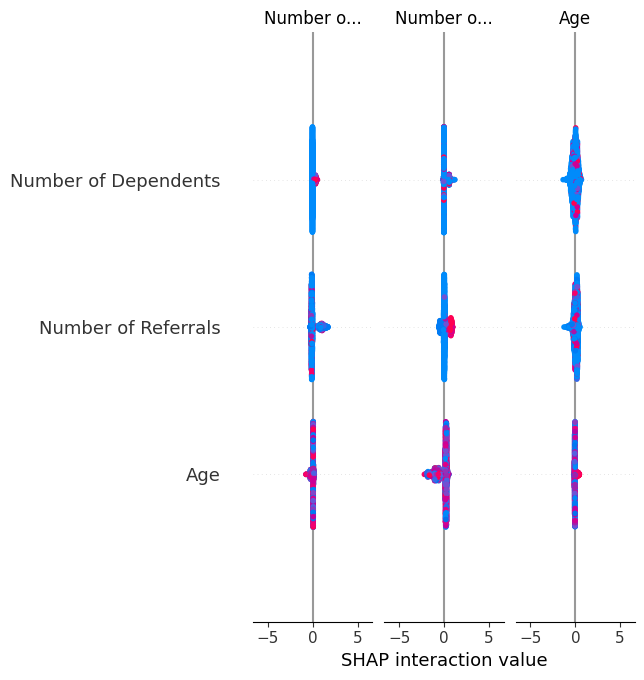

In [ ]:
import shap

# Explain model predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Determine if the problem is multiclass or binary
if isinstance(shap_values, list):
    # Multiclass case: shap_values is a list where each element corresponds to a class
  for i in range(shap_values.shape[2]):  # Loop through each class
    print(f"SHAP Summary Plot for Class {i}")
    shap.summary_plot(shap_values[:, :, i], X_test)
else:
    # Binary case: shap_values is a single array
    shap.summary_plot(shap_values, X_test)